In [1]:
#For Calculations
import math
import numpy as np
import numpy.linalg as la
import numpy.ma as ma
import scipy as scp
from scipy import optimize
from cmath import sqrt
import random
from scipy.linalg import expm
import scipy.integrate as integrate
from scipy import signal
#For storing and calling data
import pickle

#For Plotting results and Figures
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.ticker as tick

#Progress Bars
from tqdm.notebook import tqdm

In [2]:
import Functions_STP_multiscale as stpfun

In [3]:
#Setting Defaults For Plotting
#Setting Fontsizes
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)   # fontsize of the figure title
#Setting Linewidths
plt.rc('lines', linewidth=6.0)

# Stationary Solution Samples

In [4]:
#Setting Parameters

FixedParams={
    'tau_e': 1,
    'tau_i': 1,
    'tau_qe': 250,
    'tau_qi': 250,
    'tau_re': 150,
    'tau_ri': 150,
    'Aee': 0.5,
    'Aei': 0.15,
    'Aie': 0.15,
    'Aii': 0.01,
    'see': 1,
    'sei': 2,
    'sie': 2,
    'sii': 2
}

PlasticParams={
    'qe0': 2,
    'qi0': 1,
    'beta_e': 0.01,
    'beta_i': 0.01,
    'alpha_e': 0.001,
    'alpha_i': 0.1
}
#spatial vector
dx=0.005                   
x=np.arange(-6,6+dx,dx)
xdim=len(x)

th_e=0.4
th_i=0.35
eps=0.001

T=100
dt=.1  
nt=int(np.round(T/dt)+1)
Nsim=1000

In [5]:
InitialProfiles=stpfun.broad_stationary_solutions(x,[.5,.5],th_e,th_i,**FixedParams,**PlasticParams)
Ue0=InitialProfiles['Ue0']
Ui0=InitialProfiles['Ui0']

NarrowInitialProfiles=stpfun.narrow_stationary_solutions(x,0.5,th_e,th_i,**FixedParams,**PlasticParams)
Ue0N=NarrowInitialProfiles['Ue0']
Ui0N=NarrowInitialProfiles['Ui0']

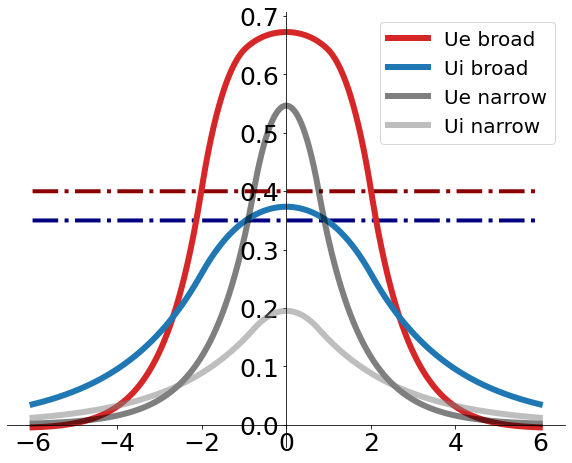

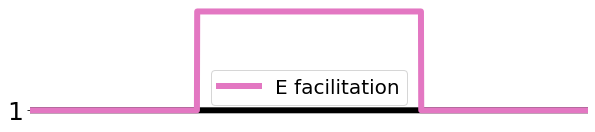

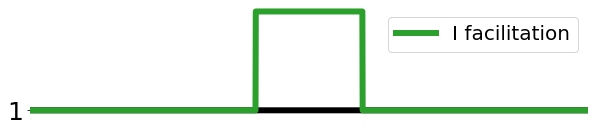

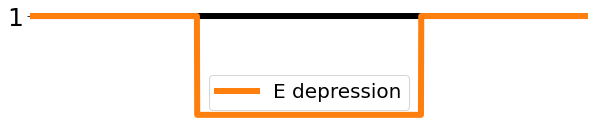

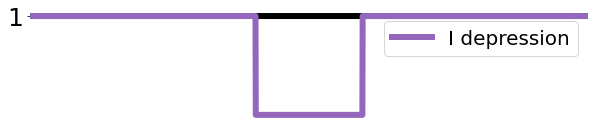

In [6]:
#######
#
#Plotting sample of stationary profiles
#
#######

#activity profiles
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left') 
ax.plot(x,np.ones(len(x))*th_e,'-.',color='darkred',linewidth=4)
ax.plot(x,np.ones(len(x))*th_i,'-.',color='navy',linewidth=4)
ax.plot(x,Ue0,color='tab:red',label='Ue broad')
ax.plot(x,Ui0,color='tab:blue',label='Ui broad')

ax.plot(x,Ue0N,color='k',label='Ue narrow',alpha=0.5)
ax.plot(x,Ui0N,color='tab:grey',label='Ui narrow',alpha=0.5)
plt.legend()

#plasticity profiles
fig = plt.figure(figsize=(10, 2))
ax = fig.add_subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.plot(x,np.ones(len(x)),'k')
ax.plot(x,InitialProfiles['Qe0']+np.ones(len(x)),color='tab:pink',label='E facilitation')
ax.set_xlim(-5,5)
ax.axes.get_xaxis().set_ticks([])
ax.set_yticks([1])
ax.legend()

fig = plt.figure(figsize=(10, 2))
ax = fig.add_subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.plot(x,np.ones(len(x)),'k')
ax.plot(x,InitialProfiles['Qi0']+np.ones(len(x)),color='tab:green',label='I facilitation')
ax.set_xlim(-5,5)
ax.axes.get_xaxis().set_ticks([])
ax.set_yticks([1])
ax.legend()

fig = plt.figure(figsize=(10, 2))
ax = fig.add_subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.plot(x,np.ones(len(x)),'k')
ax.plot(x,InitialProfiles['Re0'],color='tab:orange',label='E depression')
ax.set_xlim(-5,5)
ax.axes.get_xaxis().set_ticks([])
ax.set_yticks([1])
ax.legend()

fig = plt.figure(figsize=(10, 2))
ax = fig.add_subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.plot(x,np.ones(len(x)),'k')
ax.plot(x,InitialProfiles['Ri0'],color='tab:purple',label='I depression')
ax.set_xlim(-5,5)
ax.axes.get_xaxis().set_ticks([])
ax.set_yticks([1])
ax.legend()

# Sample wandering bumps

In [7]:
FixedParams={
    'tau_e': 1,
    'tau_i': 1,
    'tau_qe': 250,
    'tau_qi': 250,
    'tau_re': 150,
    'tau_ri': 150,
    'Aee': 0.5,
    'Aei': 0.15,
    'Aie': 0.15,
    'Aii': 0.01,
    'see': 1,
    'sei': 2,
    'sie': 2,
    'sii': 2
}

PlasticParams={
    'qe0': 0,
    'qi0': 0,
    'beta_e': 0.01,
    'beta_i': 0.01,
    'alpha_e': 0,
    'alpha_i': 0
}


dx=0.005                   
x=np.arange(-6,6+dx,dx)
xdim=len(x)


th_e=0.4
th_i=0.35
eps=0.001 #noise parameter. If zero then there is no noise.

T=1000
dt=.1
nt=int(np.round(T/dt)+1)


InitialProfiles=stpfun.broad_stationary_solutions(x,[.5,.5],th_e,th_i,**FixedParams,**PlasticParams)


In [8]:

Result=stpfun.single_simulation_allFrames(x,th_e,th_i,eps,dt,nt,**FixedParams,**PlasticParams,**InitialProfiles)

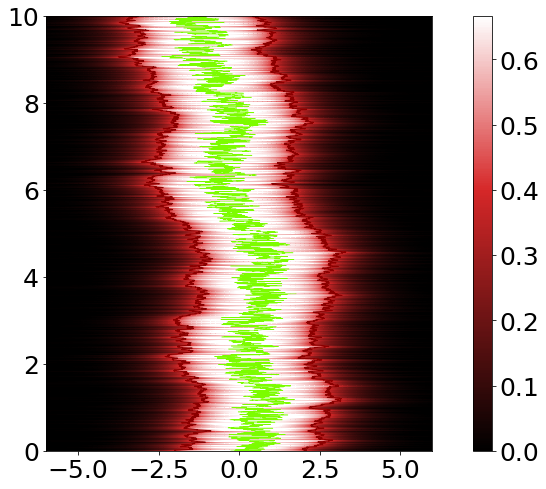

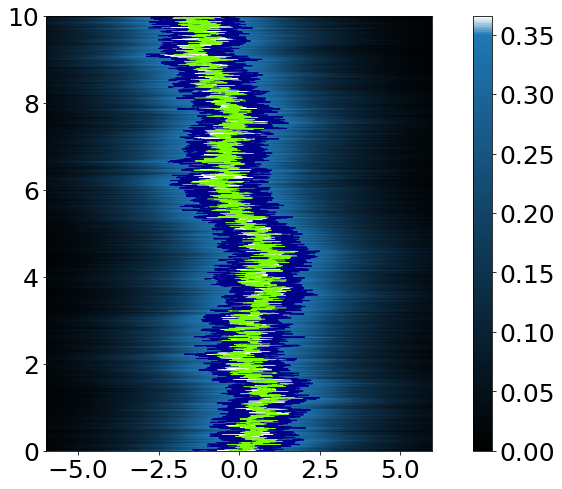

In [9]:
cemap = colors.LinearSegmentedColormap.from_list("", ["black","tab:red","white"])
cimap = colors.LinearSegmentedColormap.from_list("", ["black","tab:blue","white"])
divnorme=colors.TwoSlopeNorm(vmin=0, vcenter=th_e, vmax=max(InitialProfiles['Ue0']))
divnormi=colors.TwoSlopeNorm(vmin=0, vcenter=th_i, vmax=max(InitialProfiles['Ui0']))
timey=np.linspace(0,T,nt)/100

#Sometimes I need to skip every few frames
#because the colormesh plots come back blank sometimes 
#(I hazard a guess that too many rows breaks it a little)
skip=2
X, Y = np.meshgrid(x, timey[::skip], indexing='ij')

fig, (ax, cax) = plt.subplots(ncols=2,figsize=(8,8), 
                  gridspec_kw={"width_ratios":[1, 0.05]})
fig.subplots_adjust(wspace=0.2)
im  = ax.pcolormesh(X,Y,Result[0][:,::skip],norm=divnorme,cmap=cemap,shading='auto')
ax.contour(X, Y, Result[0][:,::skip], levels=[th_e], colors=['darkred'], linewidths=1)
ax.plot(x[np.argmax(Result[0],axis=0)],timey,'lawngreen',linewidth=0.5)
fig.colorbar(im, cax=cax)

plt.show()

fig, (ax, cax) = plt.subplots(ncols=2,figsize=(8,8), 
                  gridspec_kw={"width_ratios":[1, 0.05]})
fig.subplots_adjust(wspace=0.2)
im  = ax.pcolormesh(X,Y,Result[1][:,::skip],norm=divnormi,cmap=cimap,shading='auto')
ax.contour(X, Y, Result[1][:,::skip], levels=[th_i], colors=['darkblue'], linewidths=1)
ax.plot(x[np.argmax(Result[1],axis=0)],timey,'lawngreen',linewidth=0.5)
fig.colorbar(im, cax=cax)

plt.show()

# Sample instabilities

## Oscillatory (see fig 4 A(left))

In [10]:
FixedParams={
    'tau_e': 1,
    'tau_i': 1,
    'tau_qe': 250,
    'tau_qi': 250,
    'tau_re': 150,
    'tau_ri': 150,
    'Aee': 0.5,
    'Aei': 0.15,
    'Aie': 0.15,
    'Aii': 0.01,
    'see': 1,
    'sei': 2,
    'sie': 2,
    'sii': 2
}

PlasticParams={
    'qe0': 1,
    'qi0': 1,
    'beta_e': 0.01,
    'beta_i': 0.01,
    'alpha_e': 0.003,
    'alpha_i': 0.1
}


dx=0.005                   
x=np.arange(-3,3+dx,dx)
xdim=len(x)


th_e=0.2
th_i=0.1
eps=0

T=15
dt=.01
nt=int(np.round(T/dt)+1)



In [11]:
InitialProfiles=stpfun.broad_stationary_solutions(x,[.5,.5],th_e,th_i,**FixedParams,**PlasticParams)
InitialProfiles['Ue0'],InitialProfiles['Ui0']=0.98*InitialProfiles['Ue0'],np.roll(InitialProfiles['Ui0'],0)
Result=stpfun.single_simulation_allFrames(x,th_e,th_i,eps,dt,nt,**FixedParams,**PlasticParams,**InitialProfiles)

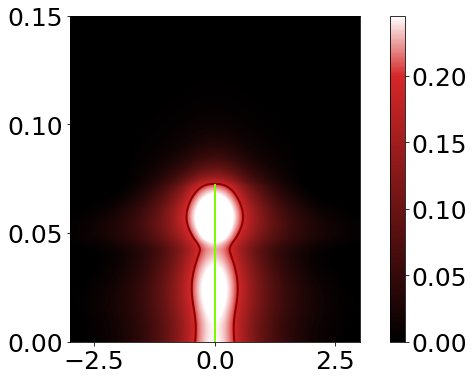

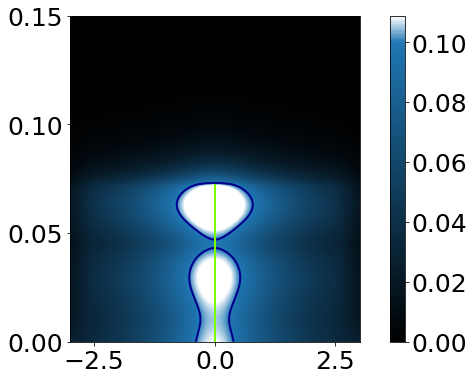

In [12]:
cemap = colors.LinearSegmentedColormap.from_list("", ["black","tab:red","white"])
cimap = colors.LinearSegmentedColormap.from_list("", ["black","tab:blue","white"])
divnorme=colors.TwoSlopeNorm(vmin=0, vcenter=th_e, vmax=max(InitialProfiles['Ue0']))
divnormi=colors.TwoSlopeNorm(vmin=0, vcenter=th_i, vmax=max(InitialProfiles['Ui0']))
timey=np.linspace(0,T,nt)/100
X, Y = np.meshgrid(x, timey, indexing='ij')

fig, (ax, cax) = plt.subplots(ncols=2,figsize=(6,6), 
                  gridspec_kw={"width_ratios":[1, 0.05]})
fig.subplots_adjust(wspace=0.2)
im  = ax.pcolormesh(X,Y,Result[0],norm=divnorme,cmap=cemap,shading='auto')
ax.contour(X, Y, Result[0], levels=[th_e], colors=['darkred'], linewidths=2)
ax.plot(x[np.argmax(Result[0],axis=0)][0:720],timey[0:720],'lawngreen',linewidth=2)
fig.colorbar(im, cax=cax)

plt.show()

fig, (ax, cax) = plt.subplots(ncols=2,figsize=(6,6), 
                  gridspec_kw={"width_ratios":[1, 0.05]})
fig.subplots_adjust(wspace=0.2)
im  = ax.pcolormesh(X,Y,Result[1],norm=divnormi,cmap=cimap,shading='auto')
ax.contour(X, Y, Result[1], levels=[th_i], colors=['darkblue'], linewidths=2)
ax.plot(x[np.argmax(Result[1],axis=0)][0:720],timey[0:720],'lawngreen',linewidth=2)
fig.colorbar(im, cax=cax)

plt.show()

## Drift Instability (see fig 4 A(right))

In [13]:
FixedParams={
    'tau_e': 1,
    'tau_i': 1,
    'tau_qe': 250,
    'tau_qi': 250,
    'tau_re': 150,
    'tau_ri': 150,
    'Aee': 0.5,
    'Aei': 0.15,
    'Aie': 0.15,
    'Aii': 0.01,
    'see': 1,
    'sei': 2,
    'sie': 2,
    'sii': 2
}

PlasticParams={
    'qe0': 0,
    'qi0': 2,
    'beta_e': 0.01,
    'beta_i': 0.01,
    'alpha_e': 0.01,
    'alpha_i': 0
}

dx=0.005                   
x=np.arange(-10,10+dx,dx)
xdim=len(x)


th_e=0.2
th_i=0.25
eps=0
T=200
dt=.01
nt=int(np.round(T/dt)+1)



In [14]:
InitialProfiles=stpfun.broad_stationary_solutions(x,[.5,.5],th_e,th_i,**FixedParams,**PlasticParams)
InitialProfiles['Ue0'],InitialProfiles['Ui0']=InitialProfiles['Ue0'],np.roll(InitialProfiles['Ui0'],400)
Result=stpfun.single_simulation_allFrames(x,th_e,th_i,eps,dt,nt,**FixedParams,**PlasticParams,**InitialProfiles)

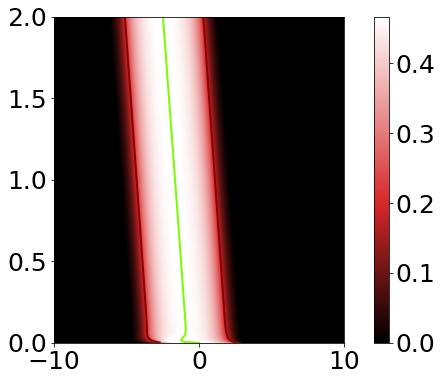

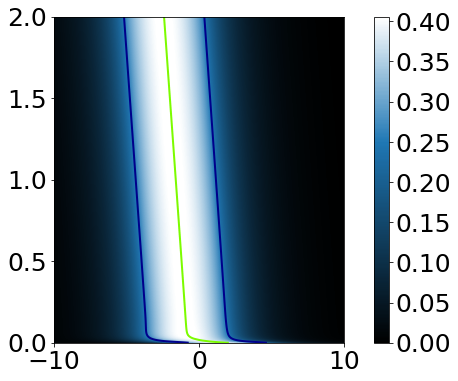

In [15]:
cemap = colors.LinearSegmentedColormap.from_list("", ["black","tab:red","white"])
cimap = colors.LinearSegmentedColormap.from_list("", ["black","tab:blue","white"])
divnorme=colors.TwoSlopeNorm(vmin=0, vcenter=th_e, vmax=max(InitialProfiles['Ue0']))
divnormi=colors.TwoSlopeNorm(vmin=0, vcenter=th_i, vmax=max(InitialProfiles['Ui0']))
timey=np.linspace(0,T,nt)/100

#Sometimes I need to skip every few frames
#because the colormesh plots come back blank sometimes 
#(I hazard a guess that too many rows breaks it a little)
skip=5 
X, Y = np.meshgrid(x, timey[::skip], indexing='ij')

fig, (ax, cax) = plt.subplots(ncols=2,figsize=(6,6), 
                  gridspec_kw={"width_ratios":[1, 0.05]})
fig.subplots_adjust(wspace=0.2)
im  = ax.pcolormesh(X,Y,Result[0][:,::skip],norm=divnorme,cmap=cemap,shading='auto')
ax.contour(X, Y, Result[0][:,::skip], levels=[th_e], colors=['darkred'], linewidths=2)
ax.plot(x[np.argmax(Result[0],axis=0)],timey,'lawngreen',linewidth=2)
fig.colorbar(im, cax=cax)

plt.show()

fig, (ax, cax) = plt.subplots(ncols=2,figsize=(6,6), 
                  gridspec_kw={"width_ratios":[1, 0.05]})
fig.subplots_adjust(wspace=0.2)
im  = ax.pcolormesh(X,Y,Result[1][:,::skip],norm=divnormi,cmap=cimap,shading='auto')
ax.contour(X, Y, Result[1][:,::skip], levels=[th_i], colors=['darkblue'], linewidths=2)
ax.plot(x[np.argmax(Result[1],axis=0)],timey,'lawngreen',linewidth=2)
fig.colorbar(im, cax=cax)

plt.show()

# Classifying Instabilities

In [16]:
#Define possible perturbation signs
possible_signs=np.array([[-1,-1,-1,-1],
                         [-1,-1,-1,1],
                         [-1,-1,1,-1],
                         [-1,1,-1,-1],
                         [1,-1,-1,-1],
                         [-1,-1,1,1],
                         [-1,1,-1,1],
                         [-1,1,1,-1],
                         [1,-1,1,-1],
                         [1,1,-1,-1],
                         [1,-1,-1,1],
                         [-1,1,1,1],
                         [1,-1,1,1],
                         [1,1,-1,1],
                         [1,1,1,-1],
                         [1,1,1,1]])

In [17]:
FixedParams={
    'tau_e': 1,
    'tau_i': 1,
    'tau_qe': 250,
    'tau_qi': 250,
    'tau_re': 150,
    'tau_ri': 150,
    'Aee': 0.5,
    'Aei': 0.15,
    'Aie': 0.15,
    'Aii': 0.01,
    'see': 1,
    'sei': 2,
    'sie': 2,
    'sii': 2
}

PlasticParams={
    'qe0': 1,
    'qi0': 1,
    'beta_e': 0.01,
    'beta_i': 0.01,
    'alpha_e': 0.003,
    'alpha_i': 0.1
}


dx=0.005                   
x=np.arange(-10,10+dx,dx)
xdim=len(x)


th_e=0.2
th_i=0.1
eps=0

T=15
dt=.01
nt=int(np.round(T/dt)+1)

InitialProfiles=stpfun.broad_stationary_solutions(x,[.5,.5],th_e,th_i,**FixedParams,**PlasticParams)



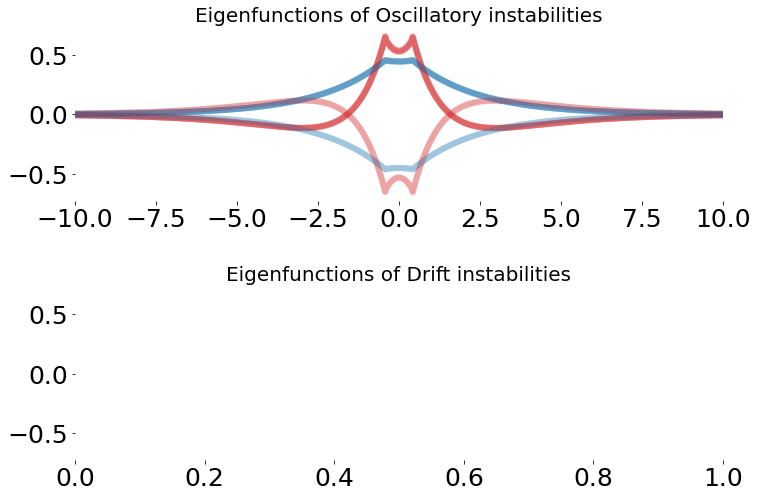

In [18]:
#counters to track number of drift and oscillatory instabilities
#Note: some perturbation cases can have both
#      for our purposes we classify the solution based on the maximal unstable eigenvalue
driftcounter=0
osccounter=0

#case instabilities tracks how many of the perturbation sign cases are unstable
#Max is 16. If any perturbation case is unstable the solution is classified as unstable.
caseinstability=0

fig, (ax, ax1) = plt.subplots(2, 1, sharey=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.title.set_text('Eigenfunctions of Oscillatory instabilities')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.title.set_text('Eigenfunctions of Drift instabilities')
plt.subplots_adjust(left=0.5,
                    bottom=0.5,
                    right=2,
                    top=2,
                    wspace=0.5,
                    hspace=0.5)
for Signs in possible_signs:
    eigs=np.real(stpfun.Eigenvals('values',Signs,**FixedParams,**PlasticParams,**InitialProfiles))
    vecs=np.real(stpfun.Eigenvals('vectors',Signs,**FixedParams,**PlasticParams,**InitialProfiles))
    yn=stpfun.isStable(eigs)
    if yn==1:
        caseinstability+=1
        lamb,maxind = max((v,i) for i,v in enumerate(eigs))
        eigvec=vecs[:,maxind]
        if lamb>10**(-8):
            Ephi,Ipsi=stpfun.EigenfunctionProfiles(lamb,Signs,x,eigvec,**FixedParams,**PlasticParams,**InitialProfiles)
            dummy=stpfun.classifyInstability(Ephi,x)
            if dummy[0]=='oscillatory':
                osccounter+=1
                ax.plot(x,Ephi,color='tab:red',alpha=0.1)
                ax.plot(x,Ipsi,color='tab:blue',alpha=0.1)
                ax.set_xlim(-10,10)
#                 print("Perturbation sign case: ", Signs)
#                 print("\n The max unstable eigenvalue for the case is an ", dummy[0], " instability")
            if dummy[0]=='drift':
                driftcounter+=1
                ax1.plot(x,Ephi,color='tab:red',alpha=0.5)
                ax1.plot(x,Ipsi,color='tab:blue',alpha=0.5)
                ax1.set_xlim(-10,10)
#                 print("Perturbation sign case: ", Signs)
#                 print("\n The max unstable eigenvalue for the case is a " , dummy[0], " instability")


In [19]:
#parameters for a region with an drift instabilities
FixedParams={
    'tau_e': 1,
    'tau_i': 1,
    'tau_qe': 250,
    'tau_qi': 250,
    'tau_re': 150,
    'tau_ri': 150,
    'Aee': 0.5,
    'Aei': 0.15,
    'Aie': 0.15,
    'Aii': 0.01,
    'see': 1,
    'sei': 2,
    'sie': 2,
    'sii': 2
}

PlasticParams={
    'qe0': 0,
    'qi0': 2,
    'beta_e': 0.01,
    'beta_i': 0.01,
    'alpha_e': 0.01,
    'alpha_i': 0
}

dx=0.005                   
x=np.arange(-10,10+dx,dx)
xdim=len(x)


th_e=0.2
th_i=0.25
eps=0
T=200
dt=.01
nt=int(np.round(T/dt)+1)

InitialProfiles=stpfun.broad_stationary_solutions(x,[.5,.5],th_e,th_i,**FixedParams,**PlasticParams)

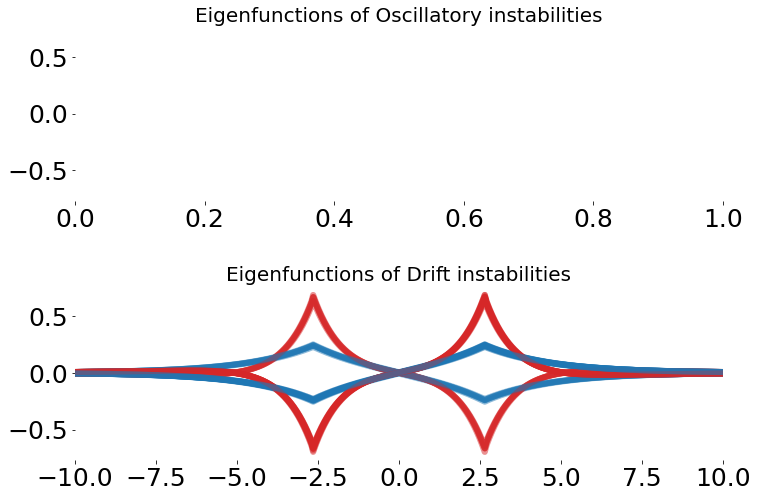

In [20]:
#counters to track number of drift and oscillatory instabilities
#Note: some perturbation cases can have both
#      for our purposes we classify the solution based on the maximal unstable eigenvalue
driftcounter=0
osccounter=0

#case instabilities tracks how many of the perturbation sign cases are unstable
#Max is 16. If any perturbation case is unstable the solution is classified as unstable.
caseinstability=0

fig, (ax, ax1) = plt.subplots(2, 1, sharey=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.title.set_text('Eigenfunctions of Oscillatory instabilities')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.title.set_text('Eigenfunctions of Drift instabilities')
plt.subplots_adjust(left=0.5,
                    bottom=0.5,
                    right=2,
                    top=2,
                    wspace=0.5,
                    hspace=0.5)
for Signs in possible_signs:
    eigs=np.real(stpfun.Eigenvals('values',Signs,**FixedParams,**PlasticParams,**InitialProfiles))
    vecs=np.real(stpfun.Eigenvals('vectors',Signs,**FixedParams,**PlasticParams,**InitialProfiles))
    yn=stpfun.isStable(eigs)
    if yn==1:
        caseinstability+=1
        lamb,maxind = max((v,i) for i,v in enumerate(eigs))
        eigvec=vecs[:,maxind]
        if lamb>10**(-8):
            Ephi,Ipsi=stpfun.EigenfunctionProfiles(lamb,Signs,x,eigvec,**FixedParams,**PlasticParams,**InitialProfiles)
            dummy=stpfun.classifyInstability(Ephi,x)
            if dummy[0]=='oscillatory':
                osccounter+=1
                ax.plot(x,Ephi,color='tab:red',alpha=0.1)
                ax.plot(x,Ipsi,color='tab:blue',alpha=0.1)
                ax.set_xlim(-10,10)
#                 print("Perturbation sign case: ", Signs)
#                 print("\n The max unstable eigenvalue for the case is an ", dummy[0], " instability")
            if dummy[0]=='drift':
                driftcounter+=1
                ax1.plot(x,Ephi,color='tab:red',alpha=0.5)
                ax1.plot(x,Ipsi,color='tab:blue',alpha=0.5)
                ax1.set_xlim(-10,10)
#                 print("Perturbation sign case: ", Signs)
#                 print("\n The max unstable eigenvalue for the case is a " , dummy[0], " instability")


## Parameter slices

The following reproduces the subplot in the 4th row and 4th column of Fig 5.

In [21]:
FixedParams={
    'tau_e': 1,
    'tau_i': 1,
    'tau_qe': 250,
    'tau_qi': 250,
    'tau_re': 150,
    'tau_ri': 150,
    'Aee': 0.5,
    'Aei': 0.15,
    'Aie': 0.15,
    'Aii': 0.01,
    'see': 1,
    'sei': 2,
    'sie': 2,
    'sii': 2
}

PlasticParams={
    'qe0': 0,
    'qi0': 0.6,
    'beta_e': 0.01,
    'beta_i': 0.01,
    'alpha_e': 0.005,
    'alpha_i': 0
}
#spatial vector
dx=0.001                   
x=np.arange(-12,12,dx)
xdim=len(x)


In [22]:
space=200
axis1=np.linspace(0,0.7,space)
axis2=np.linspace(0,0.7,space)
stabmatrix=3*np.ones((space,space))
guess=[1,1]
for i, th_e in enumerate(tqdm(axis1)):
    for k,th_i in enumerate(axis2):
        InitialProfiles=stpfun.broad_stationary_solutions(x,[.5,.5],th_e,th_i,**FixedParams,**PlasticParams)
        #Solutions that exist are classified via their stability
        if not np.isnan(InitialProfiles['ae']):
            for Signs in possible_signs:
                eigs=np.real(stpfun.Eigenvals('values',Signs,**FixedParams,**PlasticParams,**InitialProfiles))
                vecs=np.real(stpfun.Eigenvals('vectors',Signs,**FixedParams,**PlasticParams,**InitialProfiles))
                yn,lamb, evec=stpfun.isStable_vec(eigs,vecs)
                if yn==1:
                    Ephi,Ipsi=stpfun.EigenfunctionProfiles(lamb,Signs,x,evec,**FixedParams,**PlasticParams,**InitialProfiles)
                    Class,_=stpfun.classifyInstability(Ephi,x)
                    if Class=='oscillatory':
                        stabmatrix[i,k]=1
                    if Class=='drift':
                        stabmatrix[i,k]=2
                    break
        #Solutions that do not exist are assigned values of 0
        if np.isnan(InitialProfiles['ae']):
            stabmatrix[i,k]=0
        if (InitialProfiles['ae']>0.025)and(InitialProfiles['ai']>0.025):
            guess=[InitialProfiles['ae'],InitialProfiles['ai']]
            
#Note: Runtime warnings may arise for the cases where solutions cannot be found.
#large upper bounds within the stationary solution solver have been implemented 
#to avoid such errors.
#(regardless Runtime warnings should not affect the output and 
#np.nan will be returned either way).
 
#See above for how points of no solutions are classified.


  0%|          | 0/200 [00:00<?, ?it/s]

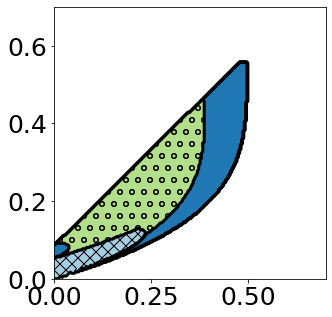

In [23]:
X, Y = np.meshgrid(axis1, axis2, indexing='ij')

fig = plt.figure(figsize=(5, 5))

cmap = colors.ListedColormap(['white','#a6cee3','#b2df8a','#1f78b4'])
bounds = [0, 1,2, 3,4]
norm = colors.BoundaryNorm(bounds, cmap.N)
plt.imshow(stabmatrix.T, interpolation = 'none',extent=[0, 0.7, 0, 0.7], cmap=cmap, norm=norm,origin='lower')
plt.contour(axis2,axis1,stabmatrix.T, levels=[0,1,2,3],
    colors=['k'],linewidths=3)
plt.contourf(axis2,axis1,stabmatrix.T,3,colors='none',hatches=['', 'xx','o',''],corner_mask=False)

# Simulating and calculating variances of wandering bumps